### HARJOITUS 5

### 1. Säädatan esittäminen


   aika, s  Air temperature, degC
0      0.0                    6.5
1    600.0                    6.2
2   1200.0                    5.7
3   1800.0                    5.7
4   2400.0                    5.7


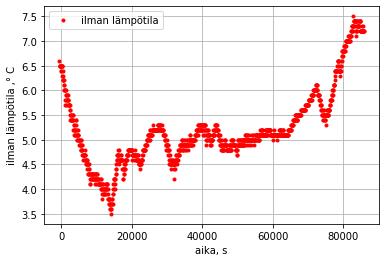

In [1]:
url="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv"

import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv(url, sep=',',decimal=".")
df["Unnamed: 0"]=pd.to_datetime(df["Unnamed: 0"])
df["aika"]=df["Unnamed: 0"]
df["aika, s"] =df["aika"]-df["Unnamed: 0"][0]
df["aika, s"]=df["aika, s"].dt.total_seconds()
df=df[["aika, s","Air temperature, degC"]]
print(df.head(5))


plt.plot( df['aika, s'],df['Air temperature, degC'], 'r.')
plt.legend(['ilman lämpötila'])
plt.xlabel('aika, s')
plt.ylabel("ilman lämpötila ,"+ u'\u00b0'+ " C" )
plt.grid()
plt.show()


### 2. Säädatan esittäminen (2)

   aika, s  Air temperature, degC  Wind speed, m/s
0      0.0                    6.5              2.3
1    600.0                    6.2              2.5
2   1200.0                    5.7              2.3
3   1800.0                    5.7              2.8
4   2400.0                    5.7              3.1


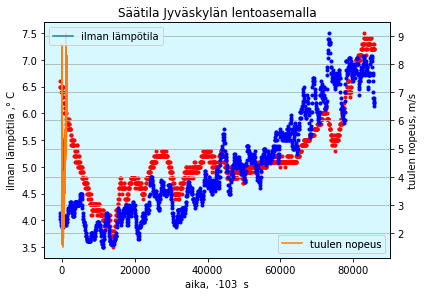

In [2]:
url="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv"

import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv(url, sep=',',decimal=".")

df["Unnamed: 0"]=pd.to_datetime(df["Unnamed: 0"])
df["aika"]=df["Unnamed: 0"]
df["aika, s"] =df["aika"]-df["Unnamed: 0"][0]
df["aika, s"]=df["aika, s"].dt.total_seconds()
df=df[["aika, s","Air temperature, degC","Wind speed, m/s"]]
print(df.head(5))

fig, ax1 = plt.subplots()

ax1.set_xlabel('aika,  ⋅103  s')
ax1.set_ylabel("ilman lämpötila ,"+ u'\u00b0'+ " C")
ax1.plot(df['aika, s'],  df['Air temperature, degC'], 'r.')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  


ax2.set_ylabel('tuulen nopeus, m/s')  
ax2.plot(df['aika, s'], df["Wind speed, m/s"], 'b.')
ax2.tick_params(axis='y')

fig.tight_layout()  

line1, = plt.plot(df['Air temperature, degC'], label="ilman lämpötila")
line2, = plt.plot(df["Wind speed, m/s"], label="tuulen nopeus")

first_legend = plt.legend(handles=[line1], loc='upper left')

ax = plt.gca().add_artist(first_legend)

second_legend=plt.legend(handles=[line2], loc='lower right')

ax = plt.gca().add_artist(second_legend)

plt.title('Säätila Jyväskylän lentoasemalla')
plt.rcParams.update({
   "axes.facecolor":    '#D7F8FF'
})


plt.grid()
plt.show()

### 3. Autodatan esittäminen

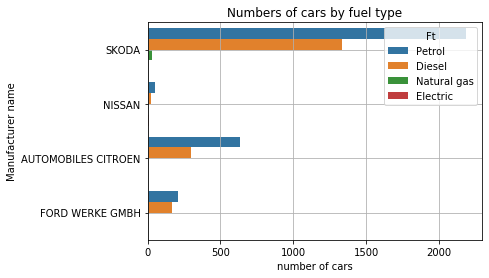

In [3]:
import pandas as pd
import seaborn as sns
#pd.set_option('display.max_columns', None)
#import warnings
#warnings.filterwarnings("ignore")
#import matplotlib.pyplot as plt
import pandas as pd
df1=pd.read_csv("autot.csv", sep='\t')
df2=df1[["Mh","Ft"]]
df2["Ft"]=df2["Ft"].replace("DIESEL", "Diesel")
df2["Ft"]=df2["Ft"].replace("PETROL", "Petrol")
df2["Ft"]=df2["Ft"].replace("NG", "Natural gas")

s = df2["Mh"].value_counts()
s = s.where(s > 50).dropna()
df2 = df2[df2["Mh"].isin(s.index)]

ax = sns.countplot(y=df2["Mh"], hue=df2["Ft"], data=df2)
plt.title('Numbers of cars by fuel type')
plt.xlabel('number of cars')
plt.ylabel('Manufacturer name')
plt.grid()
plt.show()
